# CSI4106 - Introduction to Artificial Intelligence
## Project 1 - Classification Empirical Study
---
## Fall 2022
## School of Electrical Engineering and Computer Science
---
### Professor : Caroline Barrière
---
#### Group : 9
#### Student 1: Alexander Onofrei, \#300089694
#### Student 2: Anton Pellerin-Petrov, \#300092454
---
#### Submission Date: November 1st, 2022

The goal of this project is to complete both the classification study and it's documentation. This project will detail the steps taken in order to set-up the this classification. Furthermore, 3 different classification alogirthm will be used: 
- Naïve Bayes
- Logisitc Regression
- Multi-Layer Perceptron

For each model, there will be data preparation, model training, testing using cross-validation, evaluation using precision/recall measures, parameter modification and finally result analysis. 


#1.&nbsp;Understanding the classification task for our dataset

In order to complete this project, we'll be using a dataset containing an overview of all internation men's team soccer matches played since the 90's. With this data, we'll be able to train our model in order to predict the winner and loser of past and future FIFA matches. On top of doing the aforementioned tasks for each model, we will chose the most precise model and predict the winner of the FIFA WORLD CUP 2022. This means we will predict the winners of each group stage until the very end: the winner of the world's cup final. Hence, this prediction can be used for betting across multiple sport betting plateforms or to simply pique one's curiosity. 

In order to do so, we've chosen the following dataset from Brenda Loznik which can be found [here](#scrollTo=iopsxD81TPBP&line=1&uniqifier=1). This dataset is a binary classification because for each football match registered, the teams are classified as winner or loosers. The given data can only be classified into two classes.

In [ ]:
# general imports
import sklearn
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statistics import mean
from tabulate import tabulate


#2.&nbsp;Analyzing our dataset
The following section will analyze our data by providing training examples, features and missing data of the selected dataset. 

Some data representation regarding the FIFA ranking of the top 8 FIFA men's teams is also shown in order to represent the variation of their ranking across the years.

##2.1&nbsp;Training Examples

Some training examples that can be made for this dataset set include:
- Does home team advantage truely exist?
- Longest winning streak by any team.
- Does a stronger offense rating means more scoring goals? Does a stronger defense means receiving more goals?
- What are the chances of the strongest rated team winning the match?

##2.2&nbsp;Number of Features

Below is a list of all the features for each world cup game and their data type. The strength of each team is based on the actual FIFA rankings and the players strength, for example the home_team_mean_defense_score, is based on the EA Sport FIFA video game ratings.

In [ ]:
# Importing the data from our github repository
df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/international_matches.csv'
df = pd.read_csv(df_url)
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

## 2.3 Missing Data

  As our dataset contains only the internation men's football games since summer of 2022, it does not contain the games that will be played at the FIFA World Cup. This means these games and all of their associated information will need to be added at the very end of the dataset. Therefore, the selected prediction model will be in charge of completing it by determinating the winner and looser of each game. 

## 2.4 Dataset  Data representation

This section will seek to represent the current top 8 FIFA men's FIFA teams and their FIFA ranking from the past 10 years. This is only to show how much the FIFA ranking of a team can change over the years. This results to the fact that most recent years are more important to the model than older years.

It is important to know that the lower the FIFA Ranking is, the better the team was that year. For example, a FIFA ranking of 2 is better than a FIFA ranking of 5. Also, it is impossible for 2 teams to have the same FIFA ranking for a specific year because each team has to have different FIFA ranking scores.

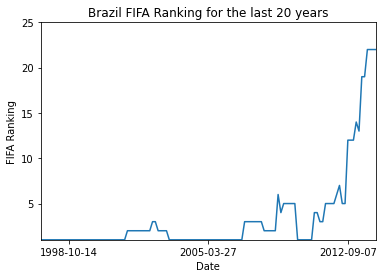

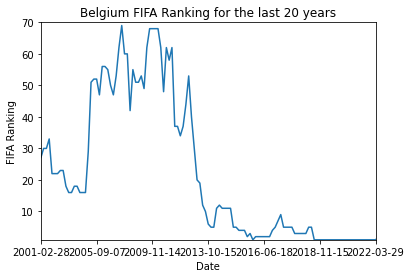

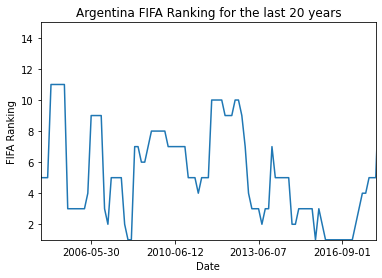

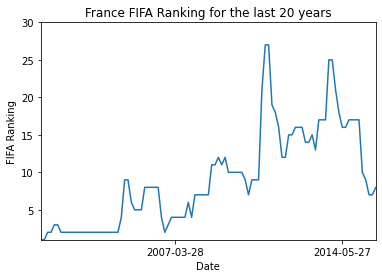

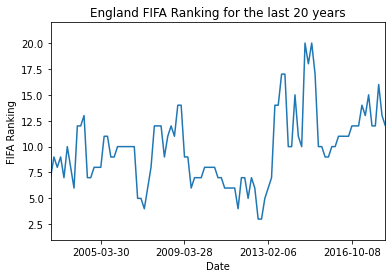

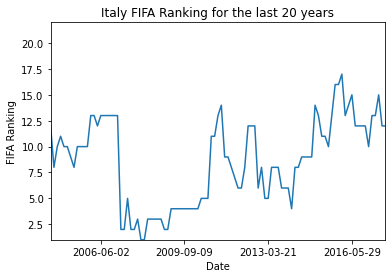

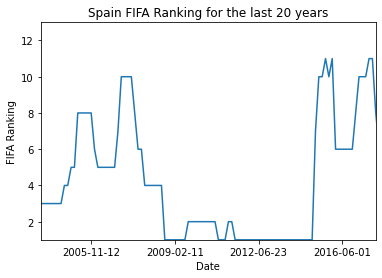

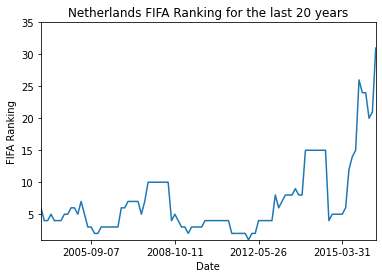

In [ ]:
filtered_team = df.loc[((df['home_team']=='Brazil'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('Brazil FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(40,160)
plt.set_ylim(1,25)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

filtered_team = df.loc[((df['home_team']=='Belgium'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('Belgium FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(40,160)
plt.set_ylim(1,70)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

filtered_team = df.loc[((df['home_team']=='Argentina'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('Argentina FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(60,160)
plt.set_ylim(1,15)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()


filtered_team = df.loc[((df['home_team']=='France'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('France FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(60,160)
plt.set_ylim(1,30)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

filtered_team = df.loc[((df['home_team']=='England'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('England FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(60,160)
plt.set_ylim(1,22)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

filtered_team = df.loc[((df['home_team']=='Italy'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('Italy FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(60,160)
plt.set_ylim(1,22)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

filtered_team = df.loc[((df['home_team']=='Spain'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('Spain FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(60,160)
plt.set_ylim(1,13)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

filtered_team = df.loc[((df['home_team']=='Netherlands'))]
plt = filtered_team.plot(x="date", y = "home_team_fifa_rank")
plt.set_title('Netherlands FIFA Ranking for the last 20 years')
plt.set_xlabel("Date")
plt.set_xlim(60,160)
plt.set_ylim(1,35)
plt.set_ylabel("FIFA Ranking")
plt.get_legend().remove()

#3.&nbsp;Brainstorming about the attributes (Feature Engineering)

As seen in the above table, our dataset contains a multiple number of useless features in predicting the winner of this year's FIFA World Cup. As all teams will be playing in the same continent and the same country, all related information to this will be removed. Therefore, the neutral_location variable will be kept because the country Qatar will be playing all home games. Hence, the value of this attribute for Qatar will be set to false but for all other countries it will be true. Also, as we seek only to predict the winner of each game, we will remove the home team and away team score. If we were to keep it, we would need to predict the score for each match of the world cup in order to predict its winner. It will then become a multi-class classification instead of a binary cllassification. Also, everything related to the rating of the players will be removed as it is not usefull for our prediction. Finally, the total fifa points for each team is directly related to their fifa ranking meaning that if we use the fifa ranking attribute, we do not need the total fifa points. 



In [ ]:
# we can remove multiple features listed below
features_to_remove = ['city',
                      'home_team_continent',
                      'away_team_continent',
                      'home_team_score',
                      'away_team_score',
                      'tournament',
                      'country',
                      'shoot_out',
                      'home_team_total_fifa_points',
                      'away_team_total_fifa_points',
                      'home_team_goalkeeper_score',
                      'away_team_goalkeeper_score',
                      'home_team_mean_defense_score',
                      'home_team_mean_offense_score',
                      'home_team_mean_midfield_score',
                      'away_team_mean_defense_score',
                      'away_team_mean_offense_score',
                      'away_team_mean_midfield_score']
df = df.drop(features_to_remove, axis=1)

Also, as we will be having a binary classification of winner or looser, we will ignore all matches that ended in a draw. Also, all the matches during the World Cup after the group stages must always end up with a winner: making the draw not possible.

In [ ]:
# As explained above, we will drop the draws from our training data because we
# to try to predict winners only
df = df[df['home_team_result'] != "Draw"]

Hence, the remaining attributes are:

In [ ]:
df.dtypes

date                   object
home_team              object
away_team              object
home_team_fifa_rank     int64
away_team_fifa_rank     int64
neutral_location         bool
home_team_result       object
dtype: object

The date attribute was kept because older matches have a less significant weight on the prediction. The most recent matches have a bigger weight because the players and staff of those teams will likely be the same during the world cup. 

We also kept the home_team and away_team attributes because it is possible that a home team is more likely of winning the match. This is based on the home team advantage principle. More information about this advantage can be found this article from [(Hegde, 2022)](#scrollTo=damyzQg57tV_&line=1&uniqifier=1).

The fifa ranks of each teams (home team and away team) are the most crucial attributes in predicting the winner of a match. In fact, a team with a higher fifa rank would be more prone in winning a match versus a lower rank fifa team. Also, the neutral_location attribute is kept because the country Qatar will be technicaly playing all home games. Therefore, the neutral_location will be set to true for the country Qatar but not for the other countries. 

Finally, the home_team_result is the attribute that will be predicted by our models.It is a boolean type value, meaning that if it is true, the home team won and if it is false, it lost the game. Hence, if the home team won, the away team lost. This is why the away_team_result is not predicted by our models.



In the table below, you can see all the games of the 2022 FIFA World Cup in a different dataset, but using the same structure. As previously mentionned, the dataset only contained played games until summer 2022. As the World Cup is in November 2022, these games weren't part of our dataset.


In [ ]:
# we import the group stage file which contains all the games
gs_df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/group_stage_games.csv'
gs_df = pd.read_csv(gs_df_url)
gs_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2022-11-20,Qatar,Ecuador,NaN,NaN,50,44,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-21,England,Iran,NaN,NaN,5,20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-21,Senegal,Netherlands,NaN,NaN,18,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-21,USA,Wales,NaN,NaN,16,19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-22,Argentina,Saudi Arabia,NaN,NaN,3,51,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-11-22,Denmark,Tunisia,NaN,NaN,10,30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-11-22,Mexico,Poland,NaN,NaN,13,26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-11-22,France,Australia,NaN,NaN,4,38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-11-23,Morocco,Croatia,NaN,NaN,22,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-11-23,Germany,Japan,NaN,NaN,11,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#4.&nbsp;Encoding the features
Our models will use discrete data because each value in the model contains clear spaces between values. For example, the fifa ranking is of integer value between 1 and 60 meaning it is impossible to have a rank of 2.56. Same principle applies to goals: it is impossible for a team to score 4.5 goals. 

In order to facilitate our model prediction and in order to have better results. We changed the date time format to timedelta integer. In this way, the model can properly predict values. If more than one game has been played during a same day, then we add the index to the timedelta value in order to separate properly each game played.

In [ ]:
# change dates to datetime format
df['date'] = pd.to_datetime(df['date'])

# first game from our dataset
first_game_date = df['date'][0]

# create timestamps by substracting dates using the first game of our dataset
df['timedelta_int'] = ((df['date'] - first_game_date).dt.total_seconds() + df.index).astype(int)
df = df.drop('date', axis=1)

For data encoding, we decided to use one-hot encoding. Each team that has been part internation men's FIFA games since the 90s will be one-hot encoded. Each home_team will have the prefix "h_" added to it's name and each away team will have the "a_" prefix added. As each team played a home and away game it will contain an encoding for each of the 2 prefixes. For example, "canada" will become "h_canada" and "a_canada" with a one-hot encoding. 

In [ ]:
# perform one hot encoding for home and away teams
df = pd.get_dummies(
    data=df,
    columns=["home_team", "away_team"],
    prefix=["h", "a"])

In [ ]:
# we can now take a look at our data, it looks ready for use
df.dtypes

home_team_fifa_rank     int64
away_team_fifa_rank     int64
neutral_location         bool
home_team_result       object
timedelta_int           int64
                        ...  
a_Vietnam               uint8
a_Wales                 uint8
a_Yemen                 uint8
a_Zambia                uint8
a_Zimbabwe              uint8
Length: 427, dtype: object

#5.&nbsp;Preparing the data for the experiment using cross-validation

In order to prepare the data from the dataset for the experiment, we must follow 2 steps:

1) Extract the attribute associated to the class we will predict. In our case that attribute is home_team_result. This means the feature will contain every attribute except the one mentionned above. In our design, we also keep a copy of the feature for further use.

2) Separate the dataset into testing and training groups using KFold. We will only use 2 splits as we believe it's enough for our use. KFold will help us split our data in a random but organized way. We will then be able to use the test data to compare our predictions to our test data.

It's important to know that for our FIFA World Cup prediction section, we also created a extra dataset used to predict the future games of the World Cup that aren't in the main dataset extracted from Kaggle.

3) In order to have a better use for our data, we must scale it using the StandardScaler. To do so, we fit tranform the X_train value and we transform the the X_test value. 

We also create a table in order to store the resulting game results. Therefore, this can be optional. 

In [ ]:
## prepare dataset by splitting training and test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# get the features columns
features = list(df.columns)
features.remove('home_team_result')

# keep a copy of the features and all the columns
all_teams_columns = list(df.columns).copy()
all_teams_features = features.copy()

X = df.loc[:, features]
y = df.loc[:, ['home_team_result']]

kf = KFold(n_splits=2) # Define the split - into 2 folds 

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

y_train = y_train.values.ravel()

In [ ]:
# Scaling the data for better use
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# We prepare a score list to in which we will add all the testing scores of all models
scores = []

#6.&nbsp;Naïve Bayes

## 6.1. Naïve Bayes with default parameters

### 6.1.1. Naïve Bayes training with default parameters

As shown in the code below, we start be creating a Naïve Bayes classifier with default parameters.

We will use the article from [(scikit-learn developers, 2011)](#scrollTo=t-tK6YBO3lbl&line=1&uniqifier=1) to tweak our parameters.

In [ ]:
# Import the Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naive Bayes model with default parameters
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train,y_train)

# Get the default parameters for later use
nb_default_params = nb_model.get_params().copy()

### 6.1.2. Naïve Bayes testing with default parameters

Here, we seek to predict the values based on our X_test values.

In [ ]:
# Do a prediction on the test data
y_pred = nb_model.predict(X_test)

### 6.1.3. Naïve Bayes evaluation with default parameters

The results below show that the precision is high, but the recall, accuracy and F1 are extremely below average.

To evaluate our model, we will use the article from [(scikit-learn developers, 2010)](#scrollTo=NYIGA4kB661Z&line=1&uniqifier=1) to find what measures we want to use. In our case, we want to use the following:
- Accuracy
- Precision
- Recall
- F1

Later, when trying to find the best model, we will determine which measures to use for a final decision.

{'precision': 0.8186666666666667, 'recall': 0.36994319159924255, 'accuracy': 0.5536369522987266, 'f1': 0.5096039838747924, 'average': 0.562962698609857, 'model': 'GaussianNB', 'params': {}}


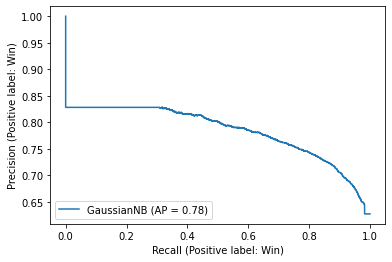

In [ ]:
# Ignore warnings for graph creation
import warnings
warnings.filterwarnings('ignore')

# Import scikit-learn metrics module for evaluation
import sklearn.metrics

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(nb_model).__name__,
    "params": dict(nb_model.get_params().items() - nb_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(nb_model, X_test, y_test)

## 6.2. Naïve Bayes with 1st iteration of parameters

### 6.2.1. Naïve Bayes training with 1st iteration of parameters

We inspire ourselves from [(Sagir, 2019)](#scrollTo=1J0I5M7G3gkD&line=1&uniqifier=1)'s article which shows how we can change Naïve Bayes parameters.

The Naïve Bayes model has very few parameters we can tweak: 
- priors : Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.
- var_smoothing : Portion of the largest variance of all features that is added to variances for calculation stability.

As we can see in the above definitions, we shouldn't touch the 'priors' parameter because it will not adjust the model.

The only parameter left to change is 'var_smoothing'. By default, it is set to '1e-9'.

We will try to make it's value a lot bigger by changing it to '1e0'.

In [ ]:
# Create an instance of the Naive Bayes model with 1st iteration of parameters
nb_model = GaussianNB(var_smoothing=1e0)

# Train the model using the training sets
nb_model.fit(X_train,y_train)

GaussianNB(var_smoothing=1.0)

### 6.2.2. Naïve Bayes testing with 1st iteration of parameters

In [ ]:
# Do a prediction on the test data
y_pred = nb_model.predict(X_test)

### 6.2.3. Naïve Bayes evaluation with 1st iteration of parameters

The results below show that the precision has dropped a little bit, and that the other values are a bit better.

{'precision': 0.7707486941381312, 'recall': 0.685832329144431, 'accuracy': 0.6751564860781352, 'f1': 0.7258152668974311, 'average': 0.7143881940645321, 'model': 'GaussianNB', 'params': {'var_smoothing': 1.0}}


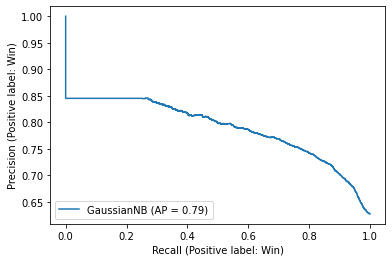

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(nb_model).__name__,
    "params": dict(nb_model.get_params().items() - nb_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(nb_model, X_test, y_test)

## 6.3. Naïve Bayes with 2nd iteration of parameters

### 6.3.1. Naïve Bayes training with 2nd iteration of parameters

We tried to make 'var_smoothing' a lot bigger, let's try to make it a lot smaller than the default.

We will change it to '1e-15'.

In [ ]:
# Create an instance of the Naive Bayes model with 2nd iteration of parameters
nb_model = GaussianNB(var_smoothing=1e-15)

# Train the model using the training sets
nb_model.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-15)

### 6.3.2. Naïve Bayes testing with 2nd iteration of parameters

In [ ]:
# Do a prediction on the test data
y_pred = nb_model.predict(X_test)

### 6.3.3. Naïve Bayes evaluation with 2nd iteration of parameters

The results below show that there isn't much difference between this variation and the default version. Overall, the scores of the Naïve Bayes classifier are not very strong.

{'precision': 0.8303622771707878, 'recall': 0.24857978998106386, 'accuracy': 0.4970861213036909, 'f1': 0.38261791202967677, 'average': 0.48966152512130484, 'model': 'GaussianNB', 'params': {'var_smoothing': 1e-15}}


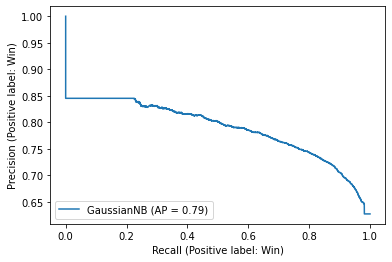

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(nb_model).__name__,
    "params": dict(nb_model.get_params().items() - nb_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(nb_model, X_test, y_test)

#7.&nbsp;Logistic Regression

## 7.1. Logistic Regression with default parameters

### 7.1.1. Logistic Regression training with default parameters

We create a Logistic Regression model using the default parameters.

We will use the article from [(scikit-learn developers, 2014)](#scrollTo=95cB783D3jQ6&line=1&uniqifier=1) to tweak our parameters.

In [ ]:
# Import the Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the Naive Bayes model with default parameters
lr_model = LogisticRegression()

# Train the model using the training sets
lr_model.fit(X_train,y_train)

# Get the default parameters for later use
lr_default_params = lr_model.get_params().copy()

### 7.1.2. Logistic Regression testing with default parameters

In [ ]:
# Do a prediction on the test data
y_pred = lr_model.predict(X_test)

### 7.1.3. Logistic Regression evaluation with default parameters

The results show an improved score in every category compared to the Naïve Bayes model.

{'precision': 0.7900119311402761, 'recall': 0.7978998106386641, 'accuracy': 0.7403410317289013, 'f1': 0.7939362795477903, 'average': 0.780547263263908, 'model': 'LogisticRegression', 'params': {}}


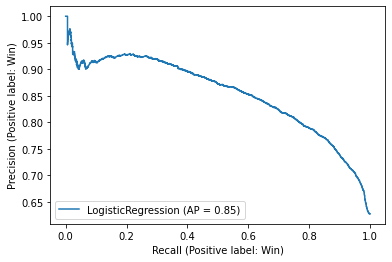

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(lr_model).__name__,
    "params": dict(lr_model.get_params().items() - lr_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(lr_model, X_test, y_test)

## 7.2. Logistic Regression with 1st iteration of parameters

### 7.2.1. Logistic Regression training with 1st iteration of parameters

We use the article from [(Stojiljković, 2019)](#scrollTo=O7ZuHG5y3qBe&line=1&uniqifier=1) to inspire ourselves for parameters modifications for the Logistic Regression model.

Online research shows that a lot of tweaks can be made to the parameters. In our case, we will modify the following:
- 'solver': Algorithm to use in the optimization problem. Default is ‘lbfgs’. We will change it to 'newton-cg'
- 'C': Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. Default is 1.0. We will change it to 0.01
- 'max_iter': Maximum number of iterations taken for the solvers to converge. Default is 100. We will augment the number of iterations to 1000.


In [ ]:
# Create an instance of the Naive Bayes model with 1st iteration of parameters
lr_model = LogisticRegression(solver='newton-cg', C=0.01, max_iter=1000)

# Train the model using the training sets
lr_model.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=1000, solver='newton-cg')

### 7.2.2. Logistic Regression testing with 1st iteration of parameters

In [ ]:
# Do a prediction on the test data
y_pred = lr_model.predict(X_test)

### 7.2.3. Logistic Regression evaluation with 1st iteration of parameters

As we can see, we have a high recall rate, so the changes we applied are very interesting. However, we don't have a lot of progress over the other scores.

{'precision': 0.785469387755102, 'recall': 0.8281976243759683, 'accuracy': 0.7504856464493849, 'f1': 0.8062678062678061, 'average': 0.7926051162120653, 'model': 'LogisticRegression', 'params': {'solver': 'newton-cg', 'max_iter': 1000, 'C': 0.01}}


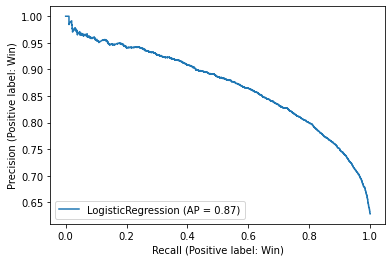

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(lr_model).__name__,
    "params": dict(lr_model.get_params().items() - lr_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(lr_model, X_test, y_test)

## 7.3. Logistic Regression with 2nd iteration of parameters

### 7.3.1. Logistic Regression training with 2nd iteration of parameters

To cope with the changes of the last iteration, we will try to augment 'C' to 0.1. We will also upgrade the number of iterations to 10 000.

In [ ]:
# Create an instance of the Naive Bayes model with 2nd iteration of parameters
lr_model = LogisticRegression(solver='newton-cg', C=0.1, max_iter=10000)

# Train the model using the training sets
lr_model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=10000, solver='newton-cg')

### 7.3.2. Logistic Regression testing with 2nd iteration of parameters

In [ ]:
# Do a prediction on the test data
y_pred = lr_model.predict(X_test)

### 7.3.3. Logistic Regression evaluation with 2nd iteration of parameters

The result we get here is pretty good.

{'precision': 0.7911660179387375, 'recall': 0.8047856773971424, 'accuracy': 0.7444420461903735, 'f1': 0.7979177334016043, 'average': 0.7845778687319644, 'model': 'LogisticRegression', 'params': {'solver': 'newton-cg', 'C': 0.1, 'max_iter': 10000}}


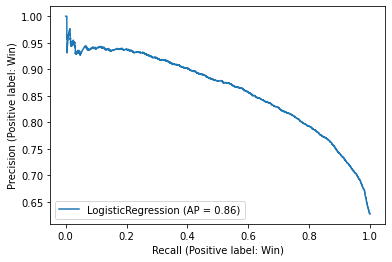

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(lr_model).__name__,
    "params": dict(lr_model.get_params().items() - lr_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(lr_model, X_test, y_test)

#8.&nbsp;Multi-Layer Perceptron

## 8.1. Multi-Layer Perceptron with default parameters

### 8.1.1. Multi-Layer Perceptron training with default parameters

We create our default MLP model.

We will use this article from [(scikit-learn developers, 2010)](#scrollTo=hSYk4HZ-3nFi&line=1&uniqifier=1) to tweak our parameters.

In [ ]:
# Import the Multi-Layer Perceptron model from sklearn
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLP model with default parameters
mlp_model = MLPClassifier()

# Train the model using the training sets
mlp_model.fit(X_train,y_train)

# Get the default parameters for later use
mlp_default_params = mlp_model.get_params().copy()

### 8.1.2. Multi-Layer Perceptron testing with default parameters

In [ ]:
# Do a prediction on the test data
y_pred = mlp_model.predict(X_test)

### 8.1.3. Multi-Layer Perceptron evaluation with default parameters

We get pretty average results with the default parameters.

{'precision': 0.7078523585577883, 'recall': 0.8550525047340334, 'accuracy': 0.6878912151953378, 'f1': 0.7745205052237643, 'average': 0.7563291459277309, 'model': 'MLPClassifier', 'params': {}}


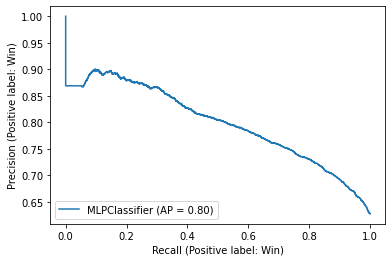

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(mlp_model).__name__,
    "params": dict(mlp_model.get_params().items() - mlp_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(mlp_model, X_test, y_test)

## 8.2. Multi-Layer Perceptron with 1st iteration of parameters



### 8.2.1. Multi-Layer Perceptron training with 1st iteration of parameters

To change our parameters for the MLP Classifier, we will use the article from [(Panjeh, 2020)](#scrollTo=GrBBiv3d3eCj&line=1&uniqifier=1)  for inspiration.

We will change the following parameters:
- hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer. Default is (100,). We will change it to (50,).
- activation: Activation function for the hidden layer. Default is 'relu'. We will change it to the hyperbolic tan function (f(x) = tanh(x)), so it will be 'tanh'
- alpha: Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss. Default is 0.0001. We will change it to a much bigger number; 1.

In [ ]:
# Create an instance of the MLP model with 1st iteration of parameters
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', alpha=1)
# Train the model using the training sets
mlp_model.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=1, hidden_layer_sizes=(50,))

### 8.2.2. Multi-Layer Perceptron testing with 1st iteration of parameters

In [ ]:
# Do a prediction on the test data
y_pred = mlp_model.predict(X_test)

### 8.2.3. Multi-Layer Perceptron evaluation with 1st iteration of parameters

The results shown below show a similar average than the default parameters, but the disparity of the results is lesser.

{'precision': 0.776174555692416, 'recall': 0.7593389567911861, 'accuracy': 0.7118497733649903, 'f1': 0.767664462234598, 'average': 0.7537569370207976, 'model': 'MLPClassifier', 'params': {'hidden_layer_sizes': (50,), 'alpha': 1, 'activation': 'tanh'}}


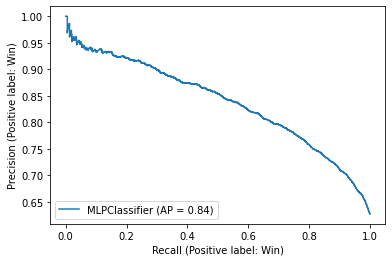

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(mlp_model).__name__,
    "params": dict(mlp_model.get_params().items() - mlp_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(mlp_model, X_test, y_test)

## 8.3. Multi-Layer Perceptron with 2nd iteration of parameters

### 8.3.1. Multi-Layer Perceptron training with 2nd iteration of parameters


In [ ]:
# Create an instance of the MLP model with 2nd iteration of parameters
mlp_model = MLPClassifier(hidden_layer_sizes=(150), max_iter=300, alpha=1, learning_rate='adaptive')
# Train the model using the training sets
mlp_model.fit(X_train,y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=150, learning_rate='adaptive',
              max_iter=300)

### 8.3.2. Multi-Layer Perceptron testing with 2nd iteration of parameters

In [ ]:
# Do a prediction on the test data
y_pred = mlp_model.predict(X_test)

### 8.3.3. Multi-Layer Perceptron evaluation with 2nd iteration of parameters

We get a bit better results.

{'precision': 0.7375620021043139, 'recall': 0.8447237045963161, 'accuracy': 0.7142240448953162, 'f1': 0.787514042689777, 'average': 0.7710059485714308, 'model': 'MLPClassifier', 'params': {'max_iter': 300, 'hidden_layer_sizes': 150, 'alpha': 1, 'learning_rate': 'adaptive'}}


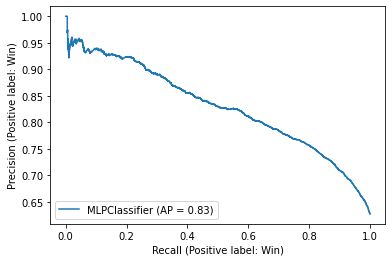

In [ ]:
# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(mlp_model).__name__,
    "params": dict(mlp_model.get_params().items() - mlp_default_params.items())
}

scores.append(score)

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(mlp_model, X_test, y_test)

#9.&nbsp;Analyzing the obtained results

Now that we tested and evaluated all the different models, we will try to decide what model with which parameters we should use.

We will get the highest scores using the precision, recall, accuraccy and f1 scores.

In [ ]:
# Most Precise Model
most_precise = max(scores, key=lambda x:x['precision'])

# Most Recall Model
most_recall = max(scores, key=lambda x:x['recall'])

# Most Accurate Model
most_accurate = max(scores, key=lambda x:x['accuracy'])

# Most F1 Model
most_f1 = max(scores, key=lambda x:x['f1'])

In [ ]:
# Show a table containing the outputted results
data = [
    ["Highest Attribute", "Model Name", "Parameters", "Value"],
    ["Precision", most_precise['model'], most_precise['params'], most_precise['precision']],
    ["Recall", most_recall['model'], most_recall['params'], most_recall['recall']],
    ["Accuracy", most_accurate['model'], most_accurate['params'], most_accurate['accuracy']],
    ["F1", most_f1['model'], most_f1['params'], most_f1['f1']]
]

import tabulate
table = tabulate.tabulate(data, tablefmt='html')

from IPython.display import HTML, display
display(HTML(table))

Highest Attribute,Model Name,Parameters,Value
Precision,GaussianNB,{'var_smoothing': 1e-15},0.8303622771707878
Recall,MLPClassifier,{},0.8550525047340334
Accuracy,LogisticRegression,"{'solver': 'newton-cg', 'max_iter': 1000, 'C': 0.01}",0.7504856464493849
F1,LogisticRegression,"{'solver': 'newton-cg', 'max_iter': 1000, 'C': 0.01}",0.8062678062678061


The table above shows all the most important scores to analyse our results. We used the article from [(Vadakattu, 2021)](#scrollTo=QO01m4oTMu-b&line=1&uniqifier=1) to format our table for better displaying of the results.

First, lets define the scores and how we could interpret them in a 'soccer game' way.

The article from [(Afonja, 2017)](#scrollTo=x_9U3qjq3YWe&line=2&uniqifier=1) will help us understand better the way the different scores work. We will use the example from the article and adapt it to our problem/dataset.

Lets take an example where we have a dataset of 100 games. The games are categorized as a home team win or a home team loss. 

We will give the following values:
- We have 40 home team wins.
- We have 60 home teams losses.

```
games = 100
wins = 40
losses = 60
```
After training our algorithm and testing it, we get the following results:
- 35 predicted wins
- 65 predicted losses

```
predicted_wins = 35
predicted_losses = 65
```
However, not all the predicted wins and predicted losses have the same origin.

Some wins were not detected, and some losses were not detected. We can break this down in 4 categories:
- 30/40 wins were detected --> We have 30 True Positives (TP)
- 10/40 wins were not detected --> We have 10 False Negatives (FN)
- 55/60 losses were detected --> We have 55 True Negatives (TN)
- 5/60 losses were not detected --> We have 5 False positives (FP)

```
TP = 30
FN = 10
TN = 55
FP = 5
```
We have the following definitions for all the important scores:
```
Accuracy = (TN + TP)/(TN + FP + TP + FN)

Precision = TP / TP + FP

Recall = TP / TP + FN

F1 = 2 * Precision * Recall / (Precision + Recall)
```
We can plug in our values from the example to get the desired scores.
```
Accuracy = (55 + 30) / (55 + 5 + 30 + 10) = 85%
Precision =  30 / (30 + 5) =  6/7 = 85.7%
Recall = 30 / (30 + 10) = 3/4 = 75%
F1 = 2 * 6/7 * 3/4 / (6/7 + 3/4) = 0.7999999999999999 ≈ 0.8
```
Now that we understand the measures and their meaning, we can apply it better to our example.

We now know that the most important measures to take into account are accuracy, because we want to predict the biggest amount of correct results, not caring about wether the result is a win or a loss.

Also, we want to use F1 because it is a combination of precision and recall, and it can help us to have an algorithm that offers high level of detail when trying to predict either a win or a loss.

Luckily, in our case, the best algorithm was the same for both measures, so there was no question about which one we should use.

In [ ]:
data = [
    ["Highest Attribute", "Model Name", "Parameters", "Value"],
    ["Accuracy", most_accurate['model'], most_accurate['params'], most_accurate['accuracy']],
    ["F1", most_f1['model'], most_f1['params'], most_f1['f1']]
]

table = tabulate.tabulate(data, tablefmt='html')

display(HTML(table))

Highest Attribute,Model Name,Parameters,Value
Accuracy,LogisticRegression,"{'solver': 'newton-cg', 'max_iter': 1000, 'C': 0.01}",0.7504856464493849
F1,LogisticRegression,"{'solver': 'newton-cg', 'max_iter': 1000, 'C': 0.01}",0.8062678062678061


The table above shows that the algorithm we will be using to predict the World Cup is the `LogisticRegression` with the following parameters: 
- 'solver': 'newton-cg'
- 'max_iter': 1000
- 'C': 0.01

#10.&nbsp;Predicting the 2022 World Cup winner
Having tested all the models, we will now decide to use only one model to predict all the games of the world cup.

The model we will use is LogisticRegression because using the parameters listed in the above section, it has the best accuracy and F1 score.

We will re train the model using 99% of our past data so that it has an even better percentage, and once it is trained we will use it to predict all the future games.

In [ ]:
# change original training dataset to use 99% of it's data for training, for a
# better final model accuracy

# we don't need to use cross validation, because we want to use all of our data
# for training
# we won't have actual testing data, just predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, 
                                                    train_size = .99)
y_train = y_train.values.ravel()

In [ ]:
# Re Scale the data for the final model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

{'precision': 0.7906976744186046, 'recall': 0.8717948717948718, 'accuracy': 0.7741935483870968, 'f1': 0.8292682926829267, 'average': 0.8164885968208749, 'model': 'LogisticRegression', 'params': dict_items([('C', 0.01), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 1000), ('multi_class', 'auto'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'newton-cg'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)])}


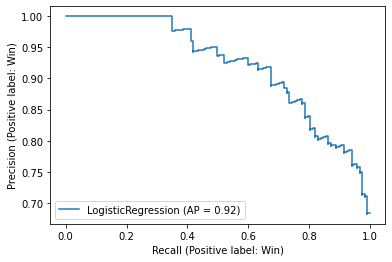

In [ ]:
# Create an instance of the Naive Bayes model with default parameters
final_model = LogisticRegression(solver='newton-cg', C=0.01, max_iter=1000)

# Train the model using the training sets
final_model.fit(X_train,y_train)

# Do a prediction on the test data
y_pred = final_model.predict(X_test)

# Ignore warnings for graph creation
warnings.filterwarnings('ignore')

# Evaluate the metrics
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='Win')
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='Win')
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label = 'Win')

score = {
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1" : f1,
    "average" : mean([precision, recall, accuracy, f1]),
    "model": type(final_model).__name__,
    "params": final_model.get_params().items()
}

print(score)

disp = sklearn.metrics.plot_precision_recall_curve(final_model, X_test, y_test)

From the results above, we can see that our final model has slight improvements over both scores by using more training data. We are now ready to use the model to do all of our predictions.



## 10.1. Predicting the Group Stages

In [ ]:
# we import the group stage file which contains all the games
gs_df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/group_stage_games.csv'
gs_df = pd.read_csv(gs_df_url)

In [ ]:
# drop the features to remove, as we have the same file structure
gs_df = gs_df.drop(features_to_remove, axis=1)

In [ ]:
# apply the date modifications to our group stage dataframe
# change dates to datetime format
gs_df['date'] = pd.to_datetime(gs_df['date'])

# create timestamps by substracting dates using the first game of our dataset
gs_df['timedelta_int'] = ((gs_df['date'] - first_game_date).dt.total_seconds() + gs_df.index).astype(int)
gs_df = gs_df.drop('date', axis=1)

In [ ]:
# perform one hot encoding for home and away teams
gs_df = pd.get_dummies(
    data=gs_df,
    columns=["home_team", "away_team"],
    prefix=["h", "a"])

In [ ]:
# prepare group stage dataset by splitting for train and test

# add missing features (because some teams arent qualified to the world cup, 
# but we still need their columns, albeit empty)
for missing_feature in list(set(all_teams_columns) - set(list(gs_df.columns))):
  gs_df[missing_feature] = 0
# reorder the columns using the original list
gs_df = gs_df.reindex(columns=all_teams_columns)

# add features for group stage
gs_features = list(gs_df.columns)
gs_features.remove('home_team_result')


# We don't need train, because we only want to predict, hence only testing
gs_X_test = gs_df.loc[:, gs_features]
gs_y_test = gs_df.loc[:, ['home_team_result']]

In [ ]:
# We use our scaler used for scaling our prediction data 
gs_X_test = sc.transform(gs_X_test)

In [ ]:
# use the final model to predict all the future games
gs_y_pred = final_model.predict(gs_X_test)
gs_df.insert(len(gs_df.columns), "home_result_pred", list(gs_y_pred))

In [ ]:
# export the groups stage df to csv
gs_df.to_csv('gs_predictions.csv')

We will now calculate the winners or every group using this tool from [(“2022 FIFA World Cup Group Stage Points Simulator”)](#scrollTo=1mRJmI8x3WD0&line=1&uniqifier=1). Every win will be 3-0, to simplify the calculations.

You can see the link to the complete result sheet [here](https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/group_stage_predictions.csv).

Here are the results of every group:
- Group A : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20A.jpg?raw=true)

- Group B : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20B.jpg?raw=true)

- Group C : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20C.jpg?raw=true)

- Group D : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20D.jpg?raw=true)

- Group E : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20E.jpg?raw=true)

- Group F : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20F.jpg?raw=true)

- Group G : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20G.jpg?raw=true)

- Group H : 
![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Group%20H.jpg?raw=true)

Here is what the knockout stages will look like:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Group%20Stage/Knockout%20Stage.jpg?raw=true)

## 10.2. Predicting the Round of 16

In [ ]:
# we import the file which contains all the future games
ks_df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/round_of_16_games.csv'
ks_df = pd.read_csv(ks_df_url)

In [ ]:
# drop the features to remove, as we have the same file structure
ks_df = ks_df.drop(features_to_remove, axis=1)

In [ ]:
# apply the date modifications to our dataframe
# change dates to datetime format
ks_df['date'] = pd.to_datetime(ks_df['date'])

# create timestamps by substracting dates using the first game of our dataset
ks_df['timedelta_int'] = ((ks_df['date'] - first_game_date).dt.total_seconds() + ks_df.index).astype(int)
ks_df = ks_df.drop('date', axis=1)

In [ ]:
# perform one hot encoding for home and away teams
ks_df = pd.get_dummies(
    data=ks_df,
    columns=["home_team", "away_team"],
    prefix=["h", "a"])

In [ ]:
# prepare the dataset by splitting for train and test

# add missing features (because some teams arent qualified to the world cup, 
# but we still need their columns, albeit empty)
for missing_feature in list(set(all_teams_columns) - set(list(ks_df.columns))):
  ks_df[missing_feature] = 0
# reorder the columns using the original list
ks_df = ks_df.reindex(columns=all_teams_columns)

# add features for group stage
ks_features = list(ks_df.columns)
ks_features.remove('home_team_result')


# We don't need train, because we only want to predict, hence only testing
ks_X_test = ks_df.loc[:, ks_features]
ks_y_test = ks_df.loc[:, ['home_team_result']]

In [ ]:
# We use our scaler used for scaling our prediction data 
ks_X_test = sc.transform(ks_X_test)

In [ ]:
# use the final model to predict all the future games
ks_y_pred = final_model.predict(ks_X_test)
ks_df.insert(len(ks_df.columns), "home_result_pred", list(ks_y_pred))
print(ks_y_pred)

['Win' 'Win' 'Win' 'Win' 'Win' 'Lose' 'Win' 'Win']


In [ ]:
# export the df to csv
ks_df.to_csv('ks_predictions.csv')

You can see the link to the complete result sheet [here](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/round_of_16_predictions.csv).

The following lines will resume the results of every game.
- Netherlands 3 : 0 USA
- England 3 : 0 Ecuador
- Argentina 3 : 0 Denmark
- France 3 : 0 Mexico
- Spain 3 : 0 Croatia
- Belgium 0 : 3 Germany
- Brazil 3 : 0 Uruguay
- Portugal 3 : 0 Switzerland

Here are the results of the Round of 16:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Round%20of%2016/Round%20of%2016%20results.jpg?raw=true)

## 10.3. Predicting the Quarter Finals

Here are the games we want to predict:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Quarter%20Finals/Quarter%20Finals%20Games.jpg?raw=true)

In [ ]:
# we import the file which contains all the future games
qf_df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/quarter_finals_games.csv'
qf_df = pd.read_csv(qf_df_url)

In [ ]:
# drop the features to remove, as we have the same file structure
qf_df = qf_df.drop(features_to_remove, axis=1)

In [ ]:
# apply the date modifications to our dataframe
# change dates to datetime format
qf_df['date'] = pd.to_datetime(qf_df['date'])

# create timestamps by substracting dates using the first game of our dataset
qf_df['timedelta_int'] = ((qf_df['date'] - first_game_date).dt.total_seconds() + qf_df.index).astype(int)
qf_df = qf_df.drop('date', axis=1)

In [ ]:
# perform one hot encoding for home and away teams
qf_df = pd.get_dummies(
    data=qf_df,
    columns=["home_team", "away_team"],
    prefix=["h", "a"])

In [ ]:
# prepare the dataset by splitting for train and test

# add missing features (because some teams arent qualified to the world cup, 
# but we still need their columns, albeit empty)
for missing_feature in list(set(all_teams_columns) - set(list(qf_df.columns))):
  qf_df[missing_feature] = 0
# reorder the columns using the original list
qf_df = qf_df.reindex(columns=all_teams_columns)

# add features for group stage
qf_features = list(qf_df.columns)
qf_features.remove('home_team_result')


# We don't need train, because we only want to predict, hence only testing
qf_X_test = qf_df.loc[:, qf_features]
qf_y_test = qf_df.loc[:, ['home_team_result']]

In [ ]:
# We use our scaler used for scaling our prediction data 
qf_X_test = sc.transform(qf_X_test)

In [ ]:
# use the final model to predict all the future games
qf_y_pred = final_model.predict(qf_X_test)
qf_df.insert(len(qf_df.columns), "home_result_pred", list(qf_y_pred))

In [ ]:
# export the df to csv
qf_df.to_csv('qf_predictions.csv')

You can see the link to the complete result sheet [here](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/quarter_finals_predictions.csv).

The following lines will resume the results of every game.
- Netherlands 0 : 3 Argentina
- England 0 : 3 France
- Spain 0 : 3 Brazil
- Germany 0 : 3 Portugal

Here are the results of the Quarter Finals:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Quarter%20Finals/Quarter%20Finals%20Results.jpg?raw=true)

## 10.4. Predicting the Semi Finals

Here are the games we want to predict:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Semi%20Finals/Semi%20Finals%20Games.jpg?raw=true)

In [ ]:
# we import the file which contains all the future games
sf_df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/semi_finals_games.csv'
sf_df = pd.read_csv(sf_df_url)

In [ ]:
# drop the features to remove, as we have the same file structure
sf_df = sf_df.drop(features_to_remove, axis=1)

In [ ]:
# apply the date modifications to our dataframe
# change dates to datetime format
sf_df['date'] = pd.to_datetime(sf_df['date'])

# create timestamps by substracting dates using the first game of our dataset
sf_df['timedelta_int'] = ((sf_df['date'] - first_game_date).dt.total_seconds() + sf_df.index).astype(int)
sf_df = sf_df.drop('date', axis=1)

In [ ]:
# perform one hot encoding for home and away teams
sf_df = pd.get_dummies(
    data=sf_df,
    columns=["home_team", "away_team"],
    prefix=["h", "a"])

In [ ]:
# prepare the dataset by splitting for train and test

# add missing features (because some teams arent qualified to the world cup, 
# but we still need their columns, albeit empty)
for missing_feature in list(set(all_teams_columns) - set(list(sf_df.columns))):
  sf_df[missing_feature] = 0
# reorder the columns using the original list
sf_df = sf_df.reindex(columns=all_teams_columns)

# add features for group stage
sf_features = list(sf_df.columns)
sf_features.remove('home_team_result')


# We don't need train, because we only want to predict, hence only testing
sf_X_test = sf_df.loc[:, sf_features]
sf_y_test = sf_df.loc[:, ['home_team_result']]

In [ ]:
# We use our scaler used for scaling our prediction data 
sf_X_test = sc.transform(sf_X_test)

In [ ]:
# use the final model to predict all the future games
sf_y_pred = final_model.predict(sf_X_test)
sf_df.insert(len(sf_df.columns), "home_result_pred", list(sf_y_pred))

In [ ]:
# export the df to csv
sf_df.to_csv('sf_predictions.csv')

You can see the link to the complete result sheet [here](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/semi_finals_predictions.csv).

The following lines will resume the results of every game.
- Argentina 0 : 3 Brazil
- France 3 : 0 Portugal

Here are the results of the Semi Finals:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Semi%20Finals/Semi%20Finals%20Results.jpg?raw=true)

## 10.5. Predicting the Finals

Here are the games we want to predict:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Finals/Finals%20Games.jpg?raw=true)

In [ ]:
# we import the file which contains all the future games
f_df_url = 'https://raw.githubusercontent.com/antonpp11/CSI4106-Project1-DB/master/finals_games.csv'
f_df = pd.read_csv(f_df_url)

In [ ]:
# drop the features to remove, as we have the same file structure
f_df = f_df.drop(features_to_remove, axis=1)

In [ ]:
# apply the date modifications to our dataframe
# change dates to datetime format
f_df['date'] = pd.to_datetime(f_df['date'])

# create timestamps by substracting dates using the first game of our dataset
f_df['timedelta_int'] = ((f_df['date'] - first_game_date).dt.total_seconds() + f_df.index).astype(int)
f_df = f_df.drop('date', axis=1)

In [ ]:
# perform one hot encoding for home and away teams
f_df = pd.get_dummies(
    data=f_df,
    columns=["home_team", "away_team"],
    prefix=["h", "a"])

In [ ]:
# prepare the dataset by splitting for train and test

# add missing features (because some teams arent qualified to the world cup, 
# but we still need their columns, albeit empty)
for missing_feature in list(set(all_teams_columns) - set(list(f_df.columns))):
  f_df[missing_feature] = 0
# reorder the columns using the original list
f_df = f_df.reindex(columns=all_teams_columns)

# add features for group stage
f_features = list(f_df.columns)
f_features.remove('home_team_result')


# We don't need train, because we only want to predict, hence only testing
f_X_test = f_df.loc[:, f_features]
f_y_test = f_df.loc[:, ['home_team_result']]

In [ ]:
# We use our scaler used for scaling our prediction data 
f_X_test = sc.transform(f_X_test)

In [ ]:
# use the final model to predict all the future games
f_y_pred = final_model.predict(f_X_test)
f_df.insert(len(f_df.columns), "home_result_pred", list(f_y_pred))

In [ ]:
# export the df to csv
f_df.to_csv('f_predictions.csv')

You can see the link to the complete result sheet [here](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/finals_prediction.csv).

The following lines will resume the results of every game.
- Brazil 0 : 3 France

Here are the results of the Final:


  ![picture](https://github.com/antonpp11/CSI4106-Project1-DB/blob/master/Images/Finals/Finals%20Results.jpg?raw=true)

#11.&nbsp;The 2022 World Cup Winner
![image](https://upload.wikimedia.org/wikipedia/commons/e/e5/France_champion_of_the_Football_World_Cup_Russia_2018.jpg)

#12.&nbsp;Conclusion

In conclusion, this project helped us define, analyse and differentiate 3 different type of classification algorithms: Naïve Bayes, Logisitc Regression and Multi-Layer Perceptron. We also studied the effects of the parameters for each algorithm by changing them and comparing the results. We noticed that a single dimensional algorithm doesn't require as much processing power and ressources as a multi-layer algorithm. However, there is a downside to it: it is less accurate. 

To top it off, we also predicted the winner of the men's 2022 FIFA World Cup that will be happening in Qatar this November. Hopefully, our most effective algorithm got it right. 

#13.&nbsp;Bibliography

- “2022 FIFA World Cup Group Stage Points Simulator.” ULTRAZONE, [ultra.zone/2022-FIFA-World-Cup-Group-Stage](https://ultra.zone/2022-FIFA-World-Cup-Group-Stage). Accessed 29 Oct. 2022.


- Afonja, Tejumade. “Model Evaluation I: Precision and Recall.” Medium, 11 Dec. 2017, [towardsdatascience.com/model-evaluation-i-precision-and-recall-166ddb257c7b](https://towardsdatascience.com/model-evaluation-i-precision-and-recall-166ddb257c7b). Accessed 29 Oct. 2022.

- Hegde, Sushmitha. "Is there An Actual Home Field Advantage When A Sports Team Plays In Their Home Stadium?" Science ABC, 22 January 2022, [https://www.scienceabc.com/social-science/is-there-an-actual-home-field-advantage-when-a-sports-team-plays-in-their-home-stadium.html](https://www.scienceabc.com/social-science/is-there-an-actual-home-field-advantage-when-a-sports-team-plays-in-their-home-stadium.html). Accessed 29 Oct. 2022. 

- Huilgol, Purva. “Precision vs Recall | Precision and Recall Machine Learning.” Analytics Vidhya, 3 Sept. 2020, [www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/). Accessed 29 Oct. 2022.

- Loznik, Brenda. “FIFA World Cup 2022.” Www.kaggle.com, 2022, [www.kaggle.com/datasets/brenda89/fifa-world-cup-2022](https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022). Accessed 29 Oct. 2022.
‌

- Panjeh. “Scikit Learn Hyperparameter Optimization for MLPClassifier.” Medium, 29 June 2020, [panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b](https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b). Accessed 29 Oct. 2022.

- Pellerin-Petrov, Anton, and Alexander Onofrei. “CSI4106-Project1-DB.” GitHub, 13 Oct. 2022, [github.com/antonpp11/CSI4106-Project1-DB](https://github.com/antonpp11/CSI4106-Project1-DB). Accessed 30 Oct. 2022.

- Sagir, Umut. “Naive Bayes Classifier Optimization & Parameters.” HolyPython.com, 2019, [holypython.com/nbc/naive-bayes-classifier-optimization-parameters/](https://holypython.com/nbc/naive-bayes-classifier-optimization-parameters/). Accessed 29 Oct. 2022.

- scikit-learn developers. “3.3. Metrics and Scoring: Quantifying the Quality of Predictions — Scikit-Learn 0.22.1 Documentation.” Scikit-Learn.org, 2010, [scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html). Accessed 29 Oct. 2022.
‌

- scikit-learn developers. “Sklearn.linear_model.LogisticRegression — Scikit-Learn 0.21.2 Documentation.” Scikit-Learn.org, 2014, [scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Accessed 29 Oct. 2022.

- scikit-learn developers. “Sklearn.naive_bayes.GaussianNB — Scikit-Learn 0.22.1 Documentation.” Scikit-Learn.org, 2011, [scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). Accessed 29 Oct. 2022.

- scikit-learn developers. “Sklearn.neural_network.MLPClassifier — Scikit-Learn 0.20.3 Documentation.” Scikit-Learn.org, 2010, [scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Accessed 29 Oct. 2022.

- Stojiljković, Mirko. “Logistic Regression in Python – Real Python.” Realpython.com, 2019, [realpython.com/logistic-regression-python/](https://realpython.com/logistic-regression-python/). Accessed 29 Oct. 2022.

- Vadakattu, Aadarsh. “Pretty Displaying Tricks for Columnar Data in Python.” Medium, 30 May 2021, [towardsdatascience.com/pretty-displaying-tricks-for-columnar-data-in-python-2fe3b3ed9b83](https://towardsdatascience.com/pretty-displaying-tricks-for-columnar-data-in-python-2fe3b3ed9b83). Accessed 29 Oct. 2022.